## **ENTENDER LAS SEÑALES**

**Temática elegida**

La temática a abordar es el ACV; Cada año, casi 800 000 personas tienen un accidente cerebrovascular, más de 140 000 mueren y muchos sobrevivientes quedan con discapacidades. Esto es alarmante teniendo en cuenta de que cerca del 80 % de los accidentes cerebrovasculares son prevenibles.

En Uruguay mueren unas cinco personas por día a causa del ACV. La patología tiene un alto costo para el sistema de salud, consumiendo del 2% al 4% de todos los recursos en salud a nivel mundial.

**Definición del objetivo**

Mediante el estudio del Dataset, se desea al finalizar el proyecto es evaluar cuales son las condiciones que se repiten cuando una persona tiene ACV

# **CONTEXTO COMERCIAL**

El accidente cerebrovascular (ACV) es una de las principales causas de discapacidad y muerte en todo el mundo, y puede tener un impacto significativo en la calidad de vida de las personas que lo sufren. Por esta razón, la prevención del ACV es un tema importante en el contexto comercial de la atención médica y la salud pública.

En términos de atención médica, los profesionales de la salud pueden recomendar cambios en el estilo de vida, como una dieta saludable y ejercicio regular, para reducir el riesgo de ACV.

En el ámbito de la salud pública, la prevención del ACV también puede ser un enfoque importante para las empresas y organizaciones que buscan promover la salud y el bienestar en la comunidad. Estos grupos pueden realizar campañas de concienciación sobre los factores de riesgo del ACV y proporcionar recursos educativos para ayudar a las personas a tomar medidas preventivas. Además, pueden trabajar con los responsables políticos y las autoridades sanitarias para implementar políticas y programas que fomenten estilos de vida más saludables y reduzcan la incidencia del ACV en la población.

En resumen, la prevención del ACV es un tema importante en el contexto comercial de la atención médica y la salud pública. Tanto los proveedores de atención médica como las empresas y organizaciones pueden desempeñar un papel importante en la prevención del ACV mediante la promoción de prácticas saludables y la provisión de productos y servicios que ayuden a reducir el riesgo de ACV.


# **PROBLEMA COMERCIAL**

Desde una perspectiva comercial, el ACV puede plantear varios problemas. En primer lugar, el costo de atención médica asociado con el tratamiento del ACV puede ser significativo, especialmente si se consideran los costos a largo plazo de la rehabilitación y la atención continua necesaria para las personas que sufren discapacidad permanente después del ACV.
La pregunta sería, 

Se puede prevenir? 

Que factores son los que inciden? 

Que podemos hacer para evitarla?


## **CONTEXTO ANALITICO**

**Los Tipos de Datos que tenemos son:**

**id**: Identificador

**gender**: Genero, "Male/Masculino", "Female/Femenino" u "Other/Otro"

**age**: Edad del paciente.

**hypertension**: Hay 2 valores, 0 si el paciente no tiene hipertension, y 1 si lo tiene.

**heart_disease**: Hay 2 valores, 0 si el paciente no tiene enfermedades en el corazón, y 1 si lo tiene.

**ever_married**: Si el paciente está casado o no.

**work_type**: Los tipos de trabajo, "children/niño", "Govt_jov/Trabajo en el gobierno", "Never_worked/Nunca trabajó", "Private/Privado" or "Self-employed/Trabaja por cuenta propia".

**Residence_type**: Tipo de residencia "Rural" or "Urban/Urbana".

**avg_glucose_level**: Nivel de Glucosa en la sangre

**bmi**: Indice de masa corporal.

**smoking_status**: Fumador? "formerly smoked/ Anteriormente fumaba", "never smoked /Nunca fumó", "smokes/Fuma" or "Unknown/Desconocido".

**stroke**: Hay 2 valores, 0 si el paciente no tuvo derrame cerebral, y 1 si lo tuvo/tiene.

Por lo que vemos acá en 3 columnas (Hypertension, Heart Disease y Stroke) los valores son 1 o 0, para un mejor manejo de estos datos, lo que vamos a hacer es categorizarlos a objetos.

# **DATA ADQUISITION**

Importamos las librerias a utilizar

In [89]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from wordcloud import WordCloud
sns.set_theme(style="whitegrid", palette="rocket")

Cargamos el dataset elegido:

In [90]:
acv = pd.read_csv ('/content/acv1.csv')

In [91]:
acv.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [92]:
# Eliminamos la columna 'ID' (modificando el dataset original)
acv.drop('id', axis=1, inplace=True)

In [93]:
# Binarizamos la columna de datos 'stroke' pasandolo a Integer
acv['stroke'] = acv['stroke'].astype(int)

acv.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [94]:
acv.head(3).T

,0,1,2
gender,Male,Female,Male
age,67.0,61.0,80.0
hypertension,0,0,0
heart_disease,1,0,1
ever_married,Yes,Yes,Yes
work_type,Private,Self-employed,Private
Residence_type,Urban,Rural,Rural
avg_glucose_level,228.69,202.21,105.92
bmi,36.6,NaN,32.5
smoking_status,formerly smoked,never smoked,never smoked


Vemos la información de los últimos 15 registros ingresados

In [95]:
acv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Vemos la informacíon del Data Frame importado, con los tipos de datos que utiliza en sus columnas 

In [96]:
acv.describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,43.23,0.1,0.05,106.15,28.89,0.05
std,22.61,0.3,0.23,45.28,7.85,0.22
min,0.08,0.0,0.00,55.12,10.30,0.00
25%,25.00,0.0,0.00,77.24,23.50,0.00
50%,45.00,0.0,0.00,91.88,28.10,0.00
75%,61.00,0.0,0.00,114.09,33.10,0.00
max,82.00,1.0,1.00,271.74,97.60,1.00


Con el método describe obtenemos un resúmen de las columnas del Data Frame, y redondeamos las cifras significativas a 2 decimales.


In [97]:
acv['hypertension'] = acv['hypertension'].astype('object')
acv['heart_disease'] = acv['heart_disease'].astype('object')
acv['stroke'] = acv['stroke'].astype('object')

# **EDA - Exploratory Data Analysis**

1 Preparar los datos 
(Data Wrangling)

2 Realizar exámen Gráfico y breve análisis estadístico.

3 Analizar Correlaciones.

4 Evaluar supuestos distribuicionales

5 Identificar posibles casos atipicos

6 Comprender los datos ausentes

Comenzamos realizando la preparación de los datos, con el objetivo de seleccionar aquellos subconjuntos de datos que nos resulten relevantes para nuestro análisis, filtrar y ordenar el dataset así como eliminar datos y/o variables nulas y duplicadas.

**Limpiar el Dataset:**

Limpiar celdas vacías

Limpiar mal formato

Revisar si hay valores faltantes (NaN)

Borrar duplicados

In [98]:
sin_valores = (acv[['hypertension','heart_disease','avg_glucose_level','bmi','stroke']] == np.nan).sum()
print(sin_valores)

hypertension         0
heart_disease        0
avg_glucose_level    0
bmi                  0
stroke               0
dtype: int64


Observamos que en el DataSet no existen celdas NULL

In [123]:
acv['stroke'] = acv['stroke'].astype(bool)

In [124]:
# MOSTRAR DATASET CARGADO 3° FILAS
acv.head(3).T

,0,2,3
gender,Male,Male,Female
age,67.0,80.0,49.0
hypertension,0,0,0
heart_disease,1,1,0
ever_married,Yes,Yes,Yes
work_type,Private,Private,Private
Residence_type,Urban,Rural,Urban
avg_glucose_level,228.69,105.92,171.23
bmi,36.6,32.5,34.4
smoking_status,formerly smoked,never smoked,smokes


In [125]:
# Creamos un diccionario para asignar valores numéricos a los valores booleanos
mapping = {True: 1, False: 0}

# Usamos la función map() para aplicar el diccionario a la columna
acv['stroke?'] = acv['stroke'].map(mapping)
acv.tail(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,stroke?
5104,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,False,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,False,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,False,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,False,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,False,0


Lo que hacemos es contar si hay valores NULL en nuestros datos

Text(0.5, 1.0, 'Matris de valores nulos o vacíos')

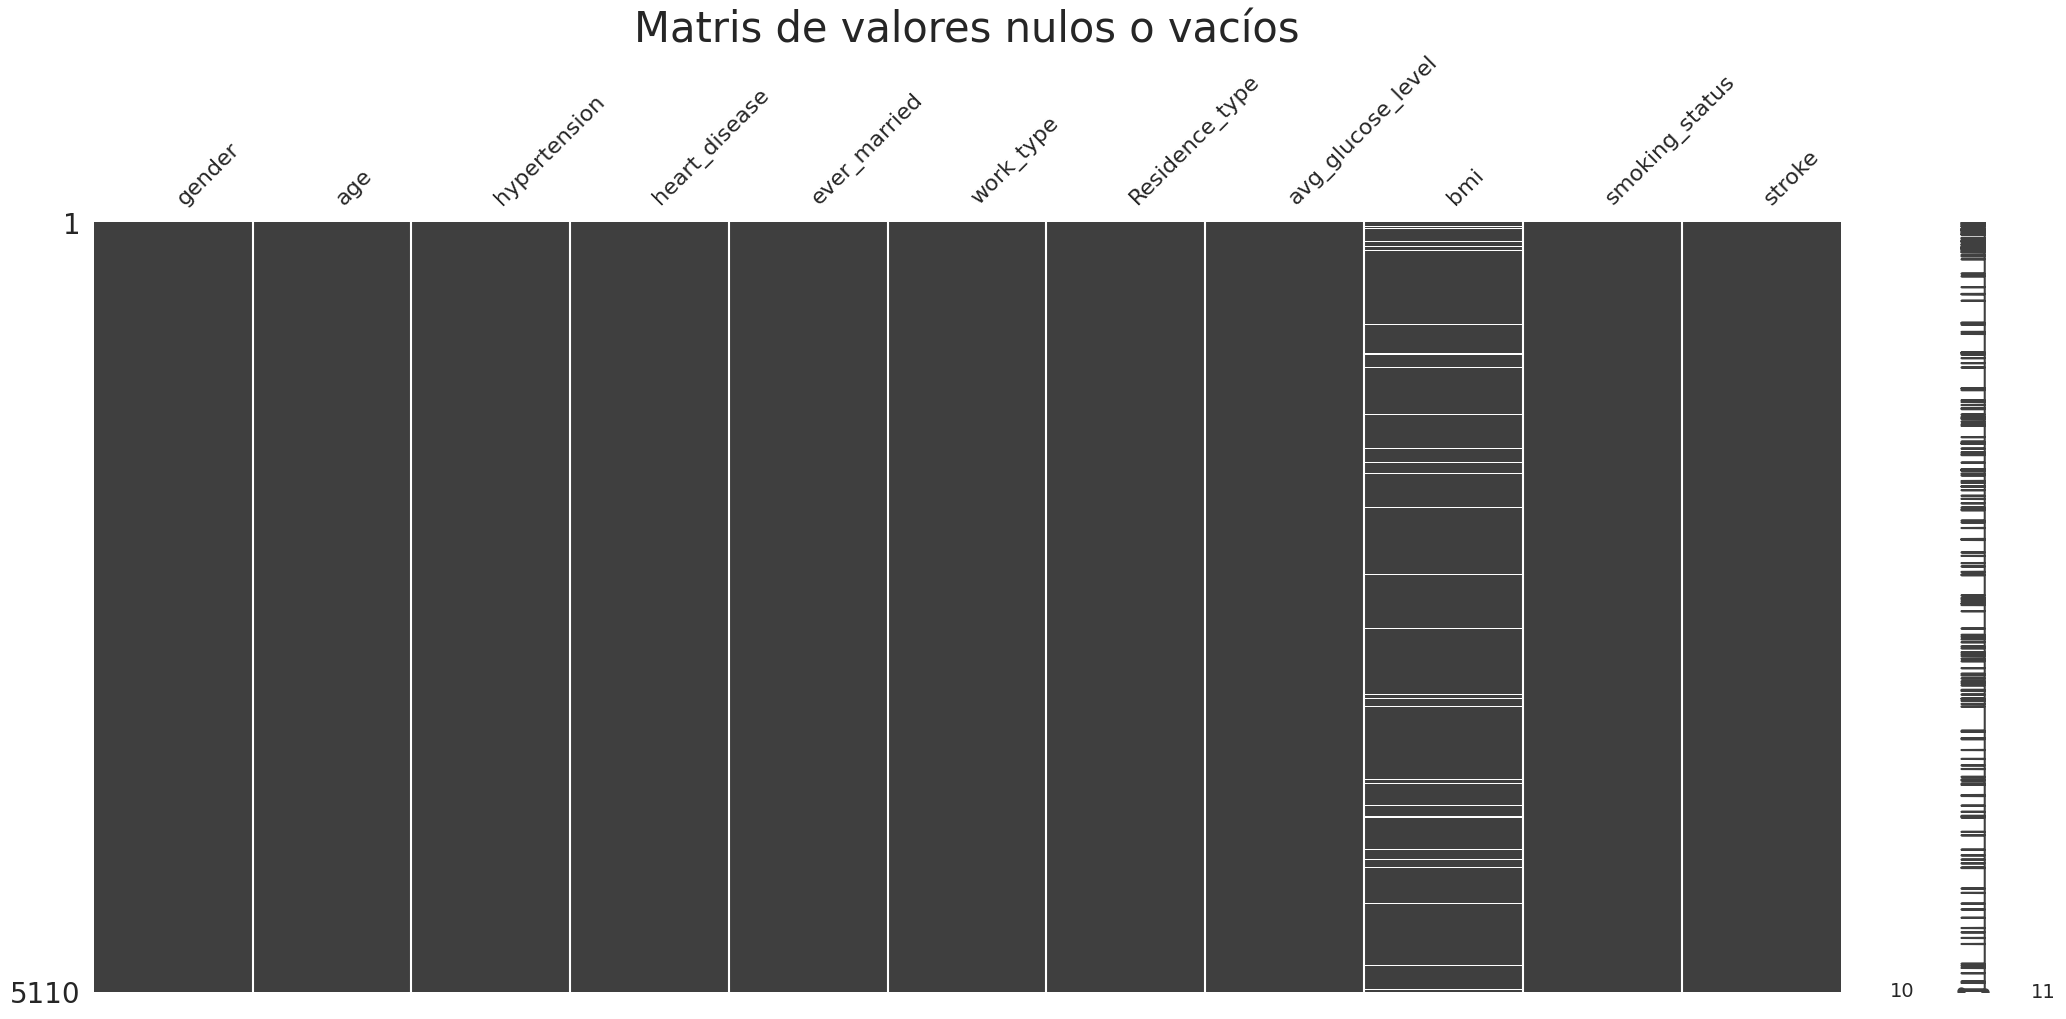

In [100]:
msno.matrix(acv)
plt.title("Matris de valores nulos o vacíos",fontsize=30)

**Indexamiento de datos:**


Podemos observar que existen datos nulos en la columna "BMI".

Dichos datos refieren al índice de masa corporal.


Otro factor importante, es saber cual es la edad donde se presenta el problema planteado, por eso necesitamos saber cual es la edad donde se presenta el problema.

In [101]:
acv.groupby(['age','stroke']) 

In [102]:
acv.groupby(['age','stroke'])['age'].count()

age    stroke
0.08   False      2
0.16   False      3
0.24   False      5
0.32   False      5
0.40   False      2
                 ..
80.00  True      17
81.00  False     46
       True      14
82.00  False     47
       True       9
Name: age, Length: 148, dtype: int64

In [103]:
acv['stroke'].value_counts()

False    4861
True      249
Name: stroke, dtype: int64

Vemos que el 95% del registro, son pacientes que no han tenido derrames cerebrales, y el 5% si.

In [104]:
stroke = acv['stroke'] == 1
stroke.head()

0    True
1    True
2    True
3    True
4    True
Name: stroke, dtype: bool

Crearemos un indice, para segmentar las personas mayores e igual de 55 años, ya que son la franja que corren mayor riesgo de sufrir un accidente cerebrovascular

In [105]:
acv55 = acv.query("age > 55")

In [106]:
stroke55 = acv.query("age > 55 and stroke < 1")

Text(0.5, 1.0, 'Boxplot')

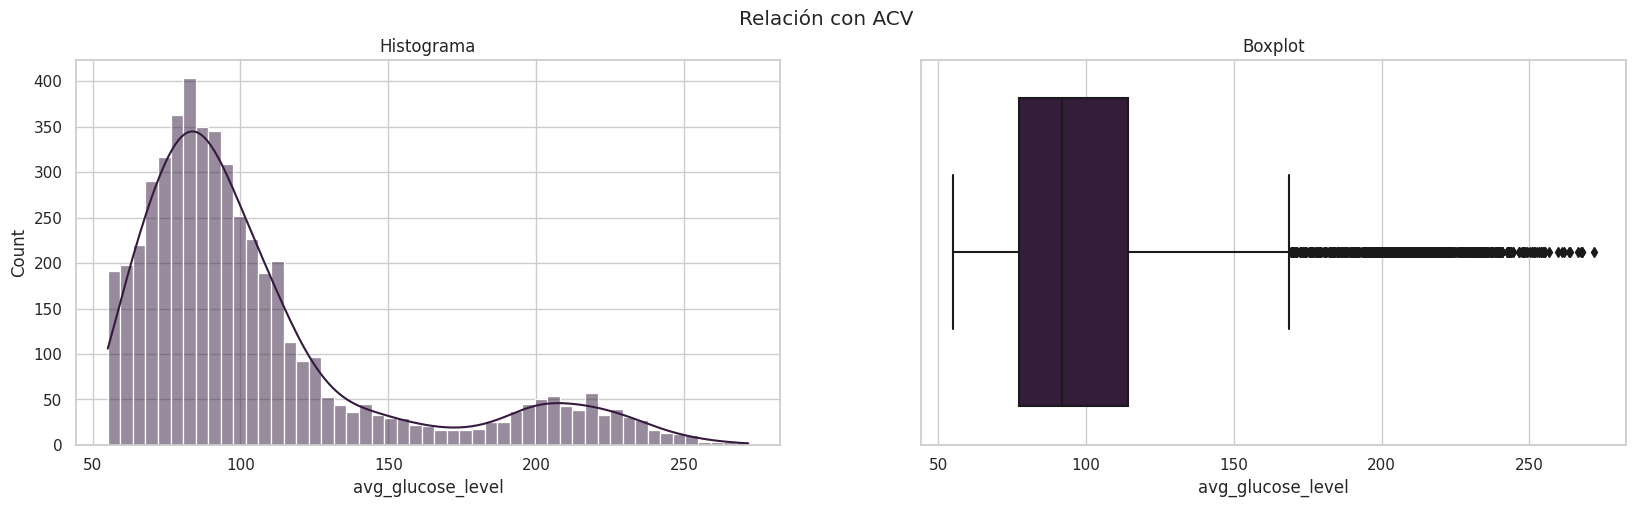

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(20, 5))
fig.suptitle('Relación con ACV')

# Histograma
sns.histplot(ax=axes[0], x = acv['avg_glucose_level'], kde = True)
axes[0].set_title("Histograma")

# Boxplot
sns.boxplot(ax=axes[1], x = acv['avg_glucose_level'])
axes[1].set_title("Boxplot")

Se logra distinguir que de los entrevistados los niveles de Gluvosa son de la mayoría de un bajo nivel.

## **CORRELACIONES Y DEPENDENCIAS**

<ipython-input-108-3dd2ba2c5bf1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(np.round(acv.corr(),2),annot=True)


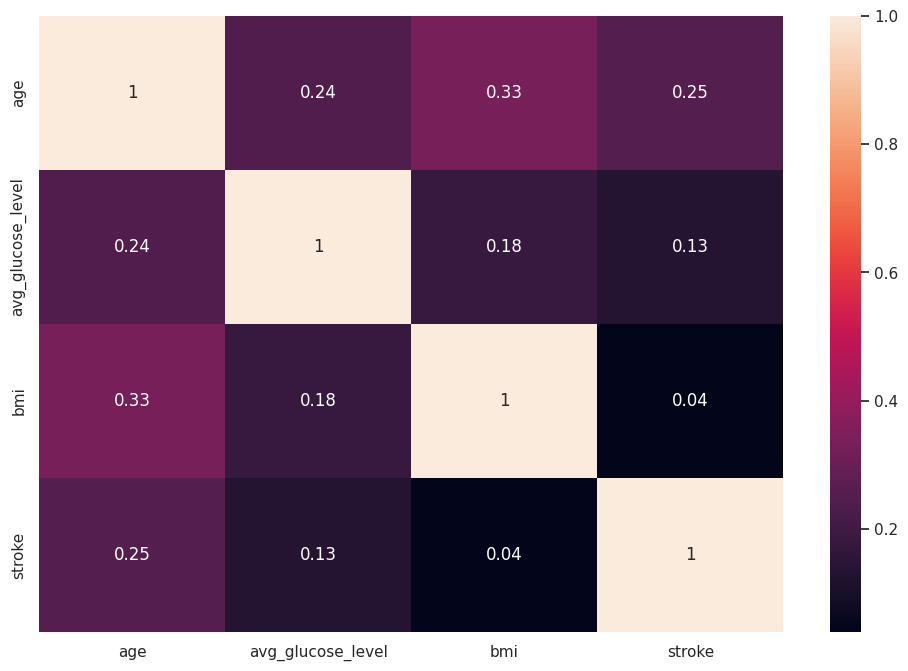

In [108]:
plt.figure(figsize=(12, 8))
sns.heatmap(np.round(acv.corr(),2),annot=True)
plt.show()

Lo que vemos acá es la correlación y dependencia, entre las variables, donde se ve el valor más alto en la intersección entre EDAD y BMI (Indice de masa corporal), en 2do nivel, se ve a la edad conjuntamente al nivel de glucosa, y por ultimo el nivel de glucosa con el BMI.


Elección de método de Feature Selection

In [109]:
!pip install mlxtend 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [110]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [111]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

Usaremos la Regresion Logística ya que se utiliza para determinar si una o múltiples variables independientes tienen un efecto sobre una variable dependiente binaria.

In [112]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X, y = load_breast_cancer(return_X_y=True)
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [113]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [114]:
# Separacion train/tet
X_train, X_test, y_train, y_test = train_test_split(X, y)
model = LogisticRegression(max_iter=10000, n_jobs=-1) 
# Ajustar modelo
model.fit(X_train, y_train) 
#Predicciones
predicciones = model.predict(X_test)
predicciones

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0])

In [115]:
print(accuracy_score(y_test, predicciones))

0.9090909090909091


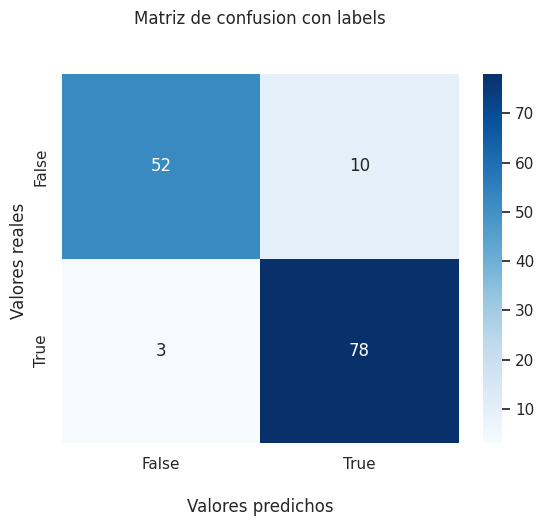

In [116]:
from sklearn.metrics import confusion_matrix
#Matriz de confusion
cf_matrix = confusion_matrix(y_test, predicciones)
import seaborn as sns
ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
ax.set_title('Matriz de confusion con labels\n\n');
ax.set_xlabel('\nValores predichos')
ax.set_ylabel('Valores reales ');
## Ticket labels - En orden alfabetico
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])
plt.show()

In [117]:
acv.info

<bound method DataFrame.info of       gender   age hypertension heart_disease ever_married      work_type  \
0       Male  67.0            0             1          Yes        Private   
1     Female  61.0            0             0          Yes  Self-employed   
2       Male  80.0            0             1          Yes        Private   
3     Female  49.0            0             0          Yes        Private   
4     Female  79.0            1             0          Yes  Self-employed   
...      ...   ...          ...           ...          ...            ...   
5105  Female  80.0            1             0          Yes        Private   
5106  Female  81.0            0             0          Yes  Self-employed   
5107  Female  35.0            0             0          Yes  Self-employed   
5108    Male  51.0            0             0          Yes        Private   
5109  Female  44.0            0             0          Yes       Govt_job   

     Residence_type  avg_glucose_level   bm

Revisamos que no hayan datos NaN en el dataset

In [118]:
print(acv.isna().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [119]:
pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [120]:
from pandas_profiling import ProfileReport
prof = ProfileReport(acv)
prof.to_file(output_file='ACV.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **MACHINE LEARNING**

In [128]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# separar las características y la variable objetivo
X = acv.drop('bmi', axis=1)  # características,acá que me gustaría poder usar más de una variable
y = acv['stroke?']  # variable objetivo

# codificar las características categóricas utilizando one-hot
X = pd.get_dummies(X, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# separar los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# entrenar un modelo de árbol de decisión
acv.dropna(subset=['bmi'], inplace=True)
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# calcular el coeficiente de determinación (R2)
r2 = r2_score(y_test, y_pred)
print('Coeficiente de determinación (R2):', r2)

Coeficiente de determinación (R2): 1.0


<ipython-input-128-abbeeb2da808>:11: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])
<ipython-input-128-abbeeb2da808>:11: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X = pd.get_dummies(X, columns=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])


# **INTRO A STORYTELLING**

In [129]:
# Para la siguiente entrega, lo que voy a hacer es generar un nuevo dataset, a modo de que no quede tan cargado la parte del storytelling con los pasos previos

acv.to_csv('ACV-Storytelling.csv', index=False)

Imagina que estás sentado en tu oficina, trabajando en tu computadora. De repente, comienzas a sentir un dolor intenso en la cabeza y tu brazo izquierdo se entumece. Tratas de moverlo, pero no responde. Tu habla se vuelve incoherente y te das cuenta de que algo está muy mal.

Lo que estás experimentando es un ACV. Los ACV son causados ​​por la interrupción del suministro de sangre al cerebro, y pueden ser fatales o dejar discapacidades graves. Son la segunda causa principal de muerte a nivel mundial y pueden afectar a cualquier persona, en cualquier momento.

**Pero hay buenas noticias:** la mayoría de los ACV se pueden prevenir con algunos cambios en tu estilo de vida. Aquí hay algunas cosas que puedes hacer para reducir tu riesgo de tener un ACV:

**Controla tu presión arterial:** La hipertensión es uno de los principales factores de riesgo para el ACV. Asegúrate de hacer chequeos regulares y tomar medicamentos según lo recetado por tu médico.

**Deja de fumar:** Fumar daña tus arterias y aumenta tu riesgo de tener un ACV. Si eres fumador, considera dejarlo lo antes posible.

**Mantén una dieta saludable:** Consumir una dieta rica en frutas, verduras, granos enteros, proteínas magras y grasas saludables puede ayudar a reducir tu riesgo de ACV. Limita la ingesta de alimentos procesados, grasas saturadas y azúcares refinados.

**Haz ejercicio regularmente:** La actividad física regular puede ayudar a reducir tu riesgo de ACV. Trata de hacer al menos 150 minutos de ejercicio moderado a la semana.

**Controla tu peso:** El sobrepeso y la obesidad aumentan tu riesgo de ACV. Si tienes sobrepeso, trata de perder peso gradualmente a través de una combinación de ejercicio y cambios en la dieta.

**Recuerda, la prevención es la clave para evitar un ACV. Haz algunos cambios en tu estilo de vida hoy para proteger tu salud y bienestar a largo plazo.**